<a href="https://colab.research.google.com/github/fathursidiq/Pythonmodel/blob/main/cnn_fix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
pip install tf-explain

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 1.5 MB/s eta 0:00:00


1/1 [==============================] - 0s 49ms/step
Image 1: di prediksikan rematik
Image 2: di prediksikan rematik
Image 3: di prediksikan rematik
Image 4: di prediksikan rematik


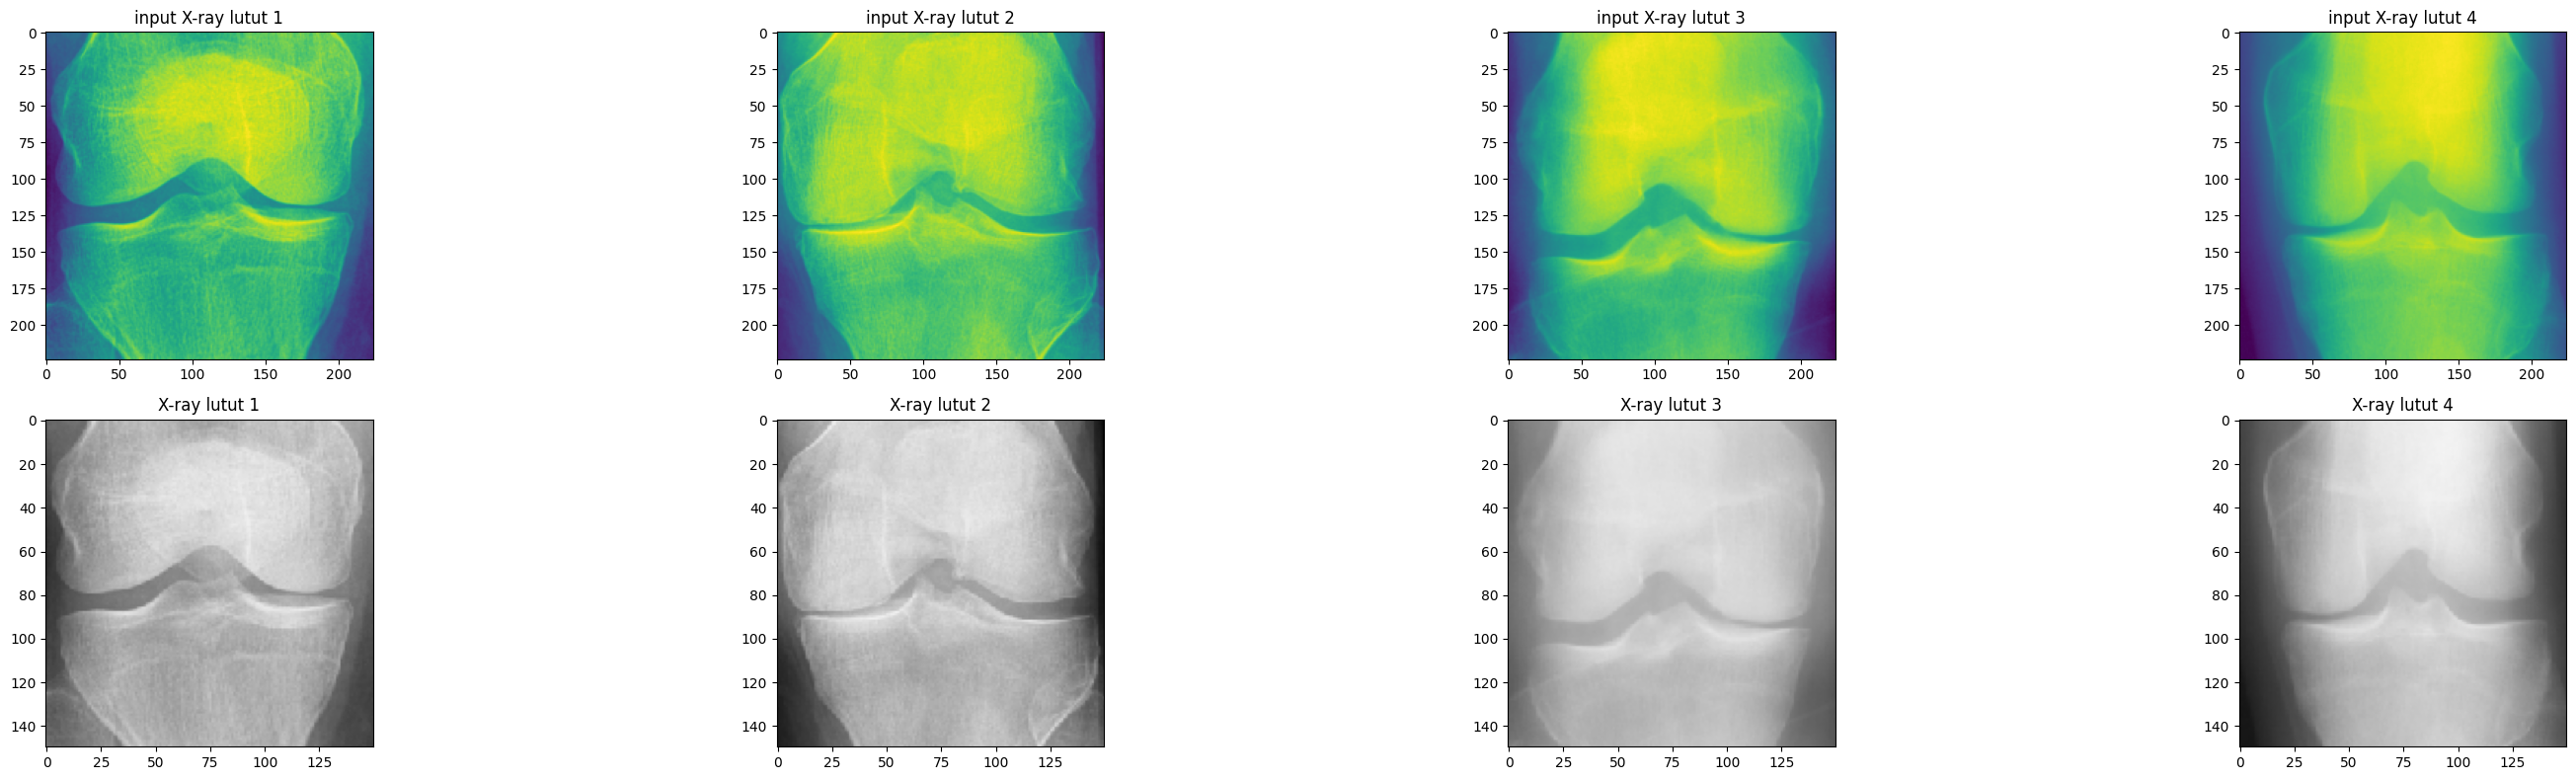

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

class ImageClassifier:
    def __init__(self, model_path, target_size=(150, 150), threshold=0.5):
        self.model = tf.keras.models.load_model(model_path)
        self.target_size = target_size
        self.threshold = threshold

    def preprocess_image(self, img_path):
        img = image.load_img(img_path, target_size=self.target_size)
        img_array = image.img_to_array(img)
        img_array = np.expand_dims(img_array, axis=0)
        img_array /= 255.0
        return img_array

    def predict_image(self, img_path):
        img_array = self.preprocess_image(img_path)
        predictions = self.model.predict(img_array)
        return predictions

    def classify_image(self, img_path):
        predictions = self.predict_image(img_path)
        if predictions[0] > self.threshold:
            return "di prediksikan rematik"
        else:
            return "di prediksikan non rematik"

class ImageDisplayer:
    def __init__(self, image_paths, preprocessed_images):
        self.image_paths = image_paths
        self.preprocessed_images = preprocessed_images

    def display_images(self):
        num_images = len(self.image_paths)
        plt.figure(figsize=(8 * num_images, 8))

        for i, (image_path, preprocessed_img) in enumerate(zip(self.image_paths, self.preprocessed_images), 1):
            plt.subplot(2, num_images, i)
            img = mpimg.imread(image_path)
            plt.imshow(img)
            plt.title(f'input X-ray lutut {i}')
            plt.axis('on')

            plt.subplot(2, num_images, num_images + i)
            plt.imshow(np.squeeze(preprocessed_img), cmap='gray')
            plt.title(f'X-ray lutut {i}')
            plt.axis('on')

        plt.tight_layout()
        plt.show()

def main():
    model_path = '/content/drive/MyDrive/trained knee/my_cnn_model.h5'
    image_paths = [
        '/content/drive/MyDrive/kneeKL224/auto_test/0/9003175_1.png',
        '/content/drive/MyDrive/kneeKL224/auto_test/3/9011053_2.png',
        '/content/drive/MyDrive/kneeKL224/auto_test/3/9156309_1.png',
        '/content/drive/MyDrive/kneeKL224/auto_test/3/9046206_2.png'
    ]  # Replace with the path to your test images

    classifier = ImageClassifier(model_path)

    # Classify each image and store the results
    results = [classifier.classify_image(image_path) for image_path in image_paths]

    # Preprocess each image and store the preprocessed images
    preprocessed_images = [classifier.preprocess_image(image_path) for image_path in image_paths]

    for i, result in enumerate(results, 1):
        print(f"Image {i}: {result}")

    # Display the images and their preprocessed versions
    image_displayer = ImageDisplayer(image_paths, preprocessed_images)
    image_displayer.display_images()

if __name__ == "__main__":
    main()

rencana selanjutnya :
- Grad cam untuk mengetahui daerah yang mendaji potensi penentuan nilai dari diagnosis rematik
- penambahan plot serta tabel untuk masing maing library yang telah di proses

Found 7034 images belonging to 11 classes.
Epoch 1/10
219/219 [==============================] - 2400s 11s/step - loss: -56728477696.0000 - accuracy: 0.1784 - val_loss: -426125492224.0000 - val_accuracy: 0.1786
Epoch 2/10
219/219 [==============================] - 467s 2s/step - loss: -7756237504512.0000 - accuracy: 0.1782 - val_loss: -26645662531584.0000 - val_accuracy: 0.1786
Epoch 3/10
219/219 [==============================] - 472s 2s/step - loss: -104952424824832.0000 - accuracy: 0.1785 - val_loss: -240673810808832.0000 - val_accuracy: 0.1786
Epoch 4/10
219/219 [==============================] - 464s 2s/step - loss: -572633695387648.0000 - accuracy: 0.1785 - val_loss: -1056443977433088.0000 - val_accuracy: 0.1786
Epoch 5/10
219/219 [==============================] - 468s 2s/step - loss: -1955622895484928.0000 - accuracy: 0.1785 - val_loss: -3150977523777536.0000 - val_accuracy: 0.1786
Epoch 6/10
219/219 [==============================] - 469s 2s/step - loss: -5081467075952640.0000

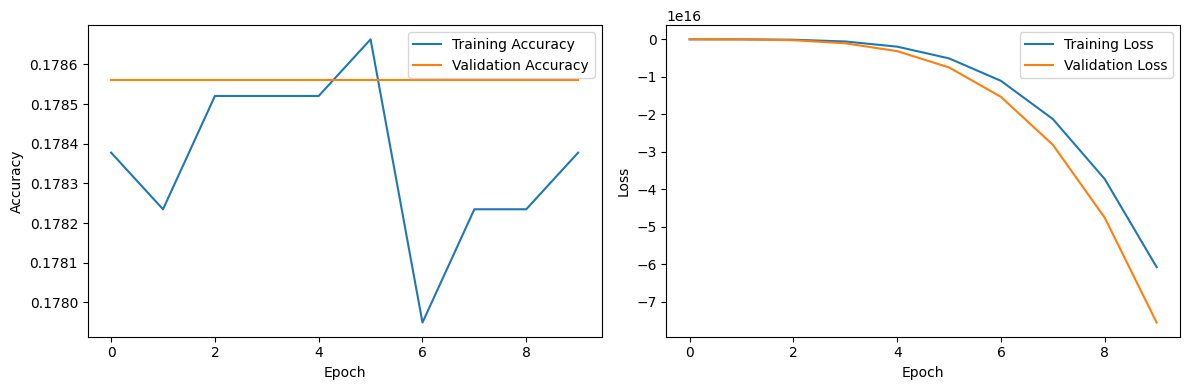

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt

class CNNImageClassifier:
    def __init__(self, input_shape=(150, 150, 3), batch_size=32, epochs=10):
        self.input_shape = input_shape
        self.batch_size = batch_size
        self.epochs = epochs
        self.model = self.build_model()
        self.compile_model()

    def build_model(self):
        model = models.Sequential([
            layers.Conv2D(32, (3, 3), activation='relu', input_shape=self.input_shape),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(64, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Conv2D(128, (3, 3), activation='relu'),
            layers.MaxPooling2D((2, 2)),
            layers.Flatten(),
            layers.Dense(128, activation='relu'),
            layers.Dense(1, activation='sigmoid')  # Binary classification output
        ])
        return model

    def compile_model(self):
        self.model.compile(optimizer='adam',
                           loss='binary_crossentropy',
                           metrics=['accuracy'])

    def train(self, train_data_dir):
        train_datagen = ImageDataGenerator(
            rescale=1.0/255.0,
            rotation_range=40,
            width_shift_range=0.2,
            height_shift_range=0.2,
            shear_range=0.2,
            zoom_range=0.2,
            horizontal_flip=True,
            fill_mode='nearest'
        )
        train_generator = train_datagen.flow_from_directory(
            train_data_dir,
            target_size=self.input_shape[:2],
            batch_size=self.batch_size,
            class_mode='binary'
        )

        # Store the training history
        history = self.model.fit(
            train_generator,
            epochs=self.epochs,
            steps_per_epoch=train_generator.samples // self.batch_size,
            verbose=1,
            validation_data=train_generator  # Use training data for simplicity (replace with validation data)
        )

        # Plot training history
        self.plot_training_history(history)

    def plot_training_history(self, history):
        # Plot training and validation accuracy
        plt.figure(figsize=(12, 4))
        plt.subplot(1, 2, 1)
        plt.plot(history.history['accuracy'], label='Training Accuracy')
        plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
        plt.xlabel('Epoch')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot training and validation loss
        plt.subplot(1, 2, 2)
        plt.plot(history.history['loss'], label='Training Loss')
        plt.plot(history.history['val_loss'], label='Validation Loss')
        plt.xlabel('Epoch')
        plt.ylabel('Loss')
        plt.legend()

        plt.tight_layout()
        plt.show()

    def save_model(self, model_path):
        self.model.save(model_path)

def main():
    input_shape = (150, 150, 3)
    batch_size = 32
    epochs = 10
    train_data_dir = '/content/drive/MyDrive/kneeKL224/train'  # Update with your data directory
    model_path = '/content/drive/MyDrive/trained knee/my_cnn_model.h5'

    classifier = CNNImageClassifier(input_shape, batch_size, epochs)
    classifier.train(train_data_dir)
    classifier.save_model(model_path)

if __name__ == "__main__":
    main()


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import os

class CNNImageClassifier:
    def __init__(self, input_shape, num_classes):
        self.input_shape = input_shape
        self.num_classes = num_classes
        self.model = self.build_model()
        self.compile_model()

    def build_model(self):
        model = models.Sequential()
        model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=self.input_shape))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(64, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Conv2D(128, (3, 3), activation='relu'))
        model.add(layers.MaxPooling2D((2, 2)))
        model.add(layers.Flatten())
        model.add(layers.Dense(128, activation='relu'))
        model.add(layers.Dense(self.num_classes, activation='softmax'))
        return model

    def compile_model(self):
        self.model.compile(optimizer='adam',
                           loss='categorical_crossentropy',
                           metrics=['accuracy'])

    def train(self, train_generator, validation_generator, epochs, batch_size):
        history = self.model.fit(train_generator, epochs=epochs,
                                 validation_data=validation_generator, batch_size=batch_size)
        return history

    def evaluate(self, test_generator):
        return self.model.evaluate(test_generator)

def main():
    train_dir = '/content/drive/MyDrive/kneeKL224/train' #harus ada iterasi pada folder
    validation_dir = '/content/drive/MyDrive/kneeKL224/val'
    test_dir = '/content/drive/MyDrive/kneeKL224/auto_test'

    train_datagen = ImageDataGenerator(
        rescale=1.0/255.0,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True
    )

    validation_datagen = ImageDataGenerator(rescale=1.0/255.0)

    test_datagen = ImageDataGenerator(rescale=1.0/255.0)

    batch_size = 32
    input_shape = (128, 128, 3)
    num_classes = len(os.listdir(train_dir))

    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=input_shape[:2],
        batch_size=batch_size,
        class_mode='categorical'
    )

    validation_generator = validation_datagen.flow_from_directory(
        validation_dir,
        target_size=input_shape[:2],
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=input_shape[:2],
        batch_size=batch_size,
        class_mode='categorical'
    )

    cnn_classifier = CNNImageClassifier(input_shape, num_classes)

    epochs = 10
    history = cnn_classifier.train(train_generator, validation_generator, epochs, batch_size)

    test_loss, test_accuracy = cnn_classifier.evaluate(test_generator)
    print("tes keakuratan:", test_accuracy)

if __name__ == "__main__":
    main()


Found 7034 images belonging to 11 classes.
